In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,precision_score, recall_score, f1_score, precision_recall_curve
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("mushroom.csv")
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [3]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,p
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4642


In [4]:
data.isnull().values.any()

False

In [5]:
data.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
class                        2
dtype: int64

In [6]:
def encode (col_name) :
    col_cats = list(data[col_name].unique())
    col_encoded = {}
    for i in range (len(col_cats)) :
        col_encoded[col_cats[i]] = i
    return (col_encoded)

In [7]:
categorical_columns = list(data.select_dtypes(exclude=["number"]).columns)

In [8]:
cleanup_nums = {}
for i in categorical_columns :
    cleanup_nums[i] = encode(i)

In [9]:
data.replace(cleanup_nums, inplace=True)

In [10]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,1,1,2,1,1


In [11]:
X = data.iloc[:,0:22]
Y = data.iloc[:,22:]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True,test_size = 0.2, random_state=90)

In [13]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 42)
clf_gini = DecisionTreeClassifier(criterion="gini", random_state = 42)

In [16]:
clf_entropy.fit(x_train, y_train)
y_pred = clf_entropy.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print ("Accuracy is ", acc)

Accuracy is  0.8935384615384615


In [17]:
#ID3 -- Entropy
print("Parameswar Kanuparthi")

Parameswar Kanuparthi



======== Confusion Matrix =========
[[835  66]
 [107 617]]

======== Precision and Recall Scores =========
Precision :  0.9033674963396779
Recall :  0.8522099447513812

======== F1 Score =========
F1 Score :  0.877043354655295

======== Precision Recall Curve =========


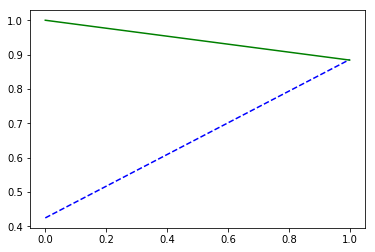


======== ROC Curve =========


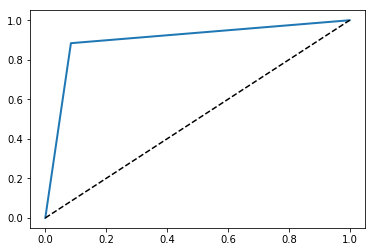

In [18]:
print ("\n======== Confusion Matrix =========")
conf_matrix = confusion_matrix(y_test, y_pred)
print (conf_matrix)
print ("\n======== Precision and Recall Scores =========")
print ("Precision : ", precision_score(y_test, y_pred))
print ("Recall : ", recall_score(y_test, y_pred))
print ("\n======== F1 Score =========")
print ("F1 Score : ", f1_score(y_test, y_pred))
y_scores = cross_val_predict(clf_entropy, x_train, y_train, cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
print ("\n======== Precision Recall Curve =========")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagon
print ("\n======== ROC Curve =========")
plot_roc_curve(fpr, tpr)
plt.show()


In [19]:
#CART -- Gini index
print("Parameswar Kanuparthi")

Parameswar Kanuparthi


In [20]:
clf_gini.fit(x_train, y_train)
y_pred = clf_gini.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print ("Accuracy is ", acc)

Accuracy is  0.9021538461538462



======== Confusion Matrix =========
[[829  72]
 [ 87 637]]

======== Precision and Recall Scores =========
Precision :  0.8984485190409027
Recall :  0.8798342541436464

======== F1 Score =========
F1 Score :  0.8890439637124913

======== Precision Recall Curve =========


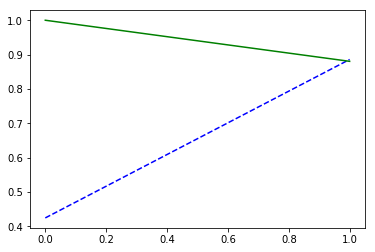


======== ROC Curve =========


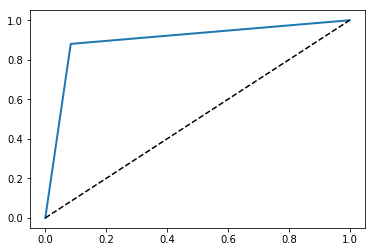

In [21]:
print ("\n======== Confusion Matrix =========")
conf_matrix = confusion_matrix(y_test, y_pred)
print (conf_matrix)
print ("\n======== Precision and Recall Scores =========")
print ("Precision : ", precision_score(y_test, y_pred))
print ("Recall : ", recall_score(y_test, y_pred))
print ("\n======== F1 Score =========")
print ("F1 Score : ", f1_score(y_test, y_pred))
y_scores = cross_val_predict(clf_gini, x_train, y_train, cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
print ("\n======== Precision Recall Curve =========")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print ("\n======== ROC Curve =========")
plot_roc_curve(fpr, tpr)
plt.show()


In [ ]:
#Since accuracy of CART Algo is more compared to ID3, CART is more suitable for classification of above data